In [ ]:
#creation un dossier kaggle
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
#copier kaggle.json dans le dossier kaggle
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/ 

In [ ]:
#donner les drroits à kaggle.json
! chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
#! kaggle datasets list

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#importer la base
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
#! unzip /content/microsoft-catsvsdogs-dataset.zip -d CatDog_data

In [ ]:
#importer librairies
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
#compiler le model cnn
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 [==============================] - 3835s 6s/step - loss: 1.3334 - accuracy: 0.6033 - val_loss: 0.5806 - val_accuracy: 0.7052


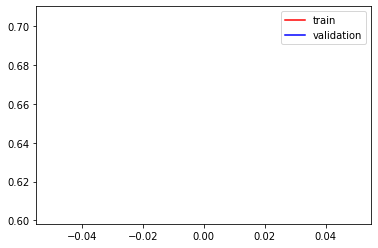

In [ ]:
#visualiser accuracy et val_accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#afficher test score et test accuracy
score = model.evaluate_generator(validation_ds, 2/1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

<ipython-input-31-38b35acd2a65>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_ds, 2/1)


Test Score: 0.5618749260902405
Test Accuracy: 0.703125


In [ ]:
#VGG16

In [ ]:
from glob import glob
from keras.applications.vgg16 import VGG16



In [ ]:
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D

In [ ]:
from keras.models import Model

In [ ]:
#definir le modele vgg16
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(25, activation='relu')(x)
predictions=Dense(2,activation='softmax')(x)
model1=Model(inputs=vgg16_model.input,outputs=predictions)


In [ ]:
model1.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist=model1.fit(train_ds,epochs=1,validation_data=validation_ds)

 16/625 [..............................] - ETA: 14:14:23 - loss: 61.8626 - accuracy: 0.4707

In [ ]:
#afficher accuracy et score pour vgg16
score = model1.evaluate_generator(validation_ds, 2/1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
#on remarque que l'accuracy pour le modele vgg16 est plus interessante que CNN